In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing needed libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import wbgapi as wb

In [3]:
# selected years and country codes for analysis
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
country_codes = ["GBR","USA","AUS","NZL","CAN","IND","JPN","RUS","CHN","DEU"]

In [4]:
# Funtions to view the existing files details and select the file name. 
def get_filename(keywords):
    results=[]
    for keyword in keywords:
        results.append(wb.search(keyword))
    return results

In [5]:
# function to retrive data from World Bank API 
def get_dataframe(selected_filename, selected_year=[2018], selected_country=['GBR']):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
    country_codes = ["GBR","USA","AUS","NZL","CAN","IND","JPN","RUS","CHN","DEU"]
    df_year = wb.data.DataFrame(selected_filename, selected_country, time = years, labels=True).drop('Country', 1)
    df_c =  wb.data.DataFrame(selected_filename, country_codes, time = selected_year, labels=True)
    df_country = df_c.transpose().iloc[1: , :]
    return df_year, df_country

#### Relations between 'Forest Area' and 'Greenhouse Gases'

In [6]:
get_filename(['forest'])

[========
 Series: AG.LND.FRST.K2, Forest area (sq. km)
 
 Developmentrelevance: ...the international community is increasingly focusing on conserving diversity. Deforestation is a major cause of loss of biodiversity, and habitat conservation is...
 --------
 IndicatorName: Forest area (sq. km)
 --------
 Limitationsandexceptions: ...and Agricultural Organization (FAO) has been collecting and analyzing data on forest area since 1946. This is done at intervals of 5-10 years as part of the Global...
 --------
 Longdefinition: ...Forest area is land under natural or planted stands of trees of at least 5 meters in...
 --------
 Statisticalconceptandmethodology: ...Forest is determined both by the presence of trees and the absence of other...
 Series: AG.LND.FRST.ZS, Forest area (% of land area)
 
 Developmentrelevance: ...the international community is increasingly focusing on conserving diversity. Deforestation is a major cause of loss of biodiversity, and habitat conservation is...
 ----

In [7]:
# Retriving the datas
Forestarea_year, ForestArea_country = get_dataframe('AG.LND.FRST.K2')
GreenhouseGas_year, GreenhouseGas_country = get_dataframe('EN.ATM.GHGT.KT.CE')

C:\Users\kova\AppData\Local\Temp/ipykernel_16492/3960046314.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_year = wb.data.DataFrame(selected_filename, selected_country, time = years, labels=True).drop('Country', 1)


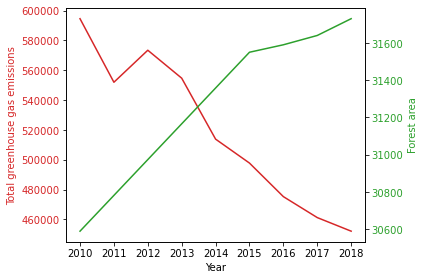

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'  #plot clour 
ax1.set_xlabel('Year')
ax1.set_ylabel('Total greenhouse gas emissions', color=color)
ax1.plot(years, GreenhouseGas_year.iloc[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'        #plot clour 
ax2.set_ylabel('Forest area', color=color)  # we already handled the x-label with ax1
ax2.plot(years, Forestarea_year.iloc[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

 we can clearly see that forest areas in the United Kingdom keep increasing over the years but when considering the greenhouse gasses, they keep reducing over the years. It is clearly shown that we can reduce the impact like climate changes due to the greenhouse gasses by increasing the areas of forest

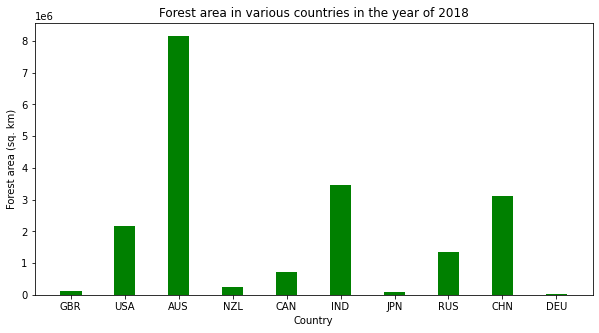

In [9]:
# plot for Forest area in various countries in the year of 2015
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(country_codes, ForestArea_country.iloc[0], color ='green',
        width = 0.4)
 
plt.xlabel("Country")
plt.ylabel("Forest area (sq. km)")
plt.title("Forest area in various countries in the year of 2018")
plt.show()

Shows the distribution of the forest areas in various countries around the world according to the year of 2018. It clearly 
shows that Australia has higher forest areas when compared to other countries. In the next level both India and China are there. 

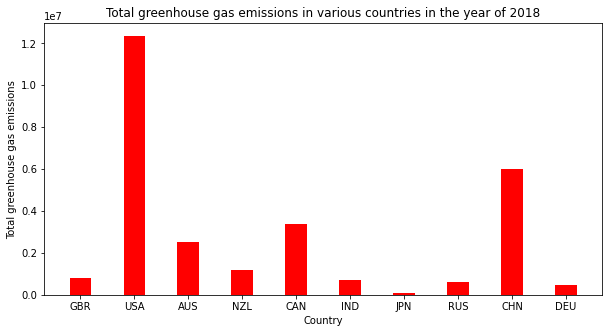

In [10]:
# plot for Total greenhouse gas emissions in various countries in the year of 2015
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(country_codes, GreenhouseGas_country.iloc[0], color ='red',
        width = 0.4)
 
plt.xlabel("Country")
plt.ylabel("Total greenhouse gas emissions")
plt.title("Total greenhouse gas emissions in various countries in the year of 2018")
plt.show()

shows that emission of greenhouse gas for the year of 2018 in various countries. It is clearly shown that the USA emits higher amounts of greenhouse gas when compared to others. China is in next place. Most of the developed countries play a key role in emitting these greenhouse gasses. It clearly shown that some country has less forest areas and produce a smaller number of harmful gases. Mainly developed countries are dominating in producing greenhouse gas and developing country have higher amount of forest area when compared with developing countries.

#### Analysing on electricity production with its method and CO2 emisson rates

In [11]:
get_filename(['electricity', 'polution'])

[========
 Series: BM.GSR.TRAN.CD, Transport services, imports (BoP, current US$)
 
 Longdefinition: ...all transport services (sea, air, land, internal waterway, pipeline, space and electricity transmission) performed by residents of one economy for those of another and...
 Series: BM.GSR.TRAN.ZS, Transport services (% of service imports, BoP)
 
 Longdefinition: ...all transport services (sea, air, land, internal waterway, pipeline, space and electricity transmission) performed by residents of one economy for those of another and...
 Series: BX.GSR.TRAN.CD, Transport services, exports (BoP, current US$)
 
 Longdefinition: ...all transport services (sea, air, land, internal waterway, pipeline, space and electricity transmission) performed by residents of one economy for those of another and...
 Series: BX.GSR.TRAN.ZS, Transport services (% of service exports, BoP)
 
 Longdefinition: ...all transport services (sea, air, land, internal waterway, pipeline, space and electricity transmissi

In [12]:
# Retriving the datas
EnergyProduction_year, EnergyProduction_country = get_dataframe('EG.ELC.NGAS.ZS')
EnergyProductionOilGasCoal_year, EnergyProductionOilGasCoal_country = get_dataframe('EG.ELC.FOSL.ZS')
EnergyProductionCoal_year, EnergyProductionCoal_country = get_dataframe('EG.ELC.COAL.ZS')
ElectricityAccess_year, ElectricityAccess_country = get_dataframe('EG.ELC.ACCS.ZS')
CO2Emision_year, CO2Emision_country = get_dataframe('EN.CO2.ETOT.ZS')

C:\Users\kova\AppData\Local\Temp/ipykernel_16492/3960046314.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_year = wb.data.DataFrame(selected_filename, selected_country, time = years, labels=True).drop('Country', 1)


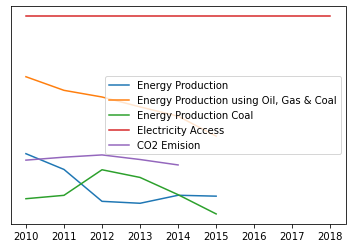

In [13]:
# Trend of various energy producing techniques and CO2 emission over the years

fig, ax = plt.subplots()
ax.plot(years, EnergyProduction_year.iloc[0], label="Energy Production")    # defining the plots 
ax.plot(years, EnergyProductionOilGasCoal_year.iloc[0], label="Energy Production using Oil, Gas & Coal")
ax.plot(years, EnergyProductionCoal_year.iloc[0], label="Energy Production Coal")
ax.plot(years, ElectricityAccess_year.iloc[0], label="Electricity Access")
ax.plot(years, CO2Emision_year.iloc[0], label="CO2 Emision")

ax.get_yaxis().set_visible(False)   #disabling the y-axis 
ax.legend(loc=0)

plt.show()

The United Kingdom has various methods to generate electricity and energy like oil, coal, natural gas etc. From Fig4. The trends are shown in a very understandable manner. Electricity access over the years found to be in a fixed trend. In energy production we can notice that from 2010 to 2012 there is decreasing nature but after 2012 it began to increase. Electricity production using oil, coal and gas are in decreasing trend. It is clearly seen that the United Kingdom started to reduce these methods which are harmful for the environment. Anyhow CO2 emission is approximately the same amount over the years.

#### total CO2 analysis

In [14]:
get_filename(['CO2'])

[========
 Series: EN.ATM.CO2E.EG.ZS, CO2 intensity (kg per kg of oil equivalent energy use)
 
 Developmentrelevance: ...Carbon dioxide (CO2) is naturally occurring gas fixed by photosynthesis into organic matter. A...
 --------
 IndicatorName: CO2 intensity (kg per kg of oil equivalent energy use)
 Series: EN.ATM.CO2E.GF.KT, CO2 emissions from gaseous fuel consumption (kt)
 
 Developmentrelevance: ...Carbon dioxide (CO2) is naturally occurring gas fixed by photosynthesis into organic matter. A...
 --------
 IndicatorName: CO2 emissions from gaseous fuel consumption (kt)
 Series: EN.ATM.CO2E.GF.ZS, CO2 emissions from gaseous fuel consumption (% of total)
 
 Developmentrelevance: ...Carbon dioxide (CO2) is naturally occurring gas fixed by photosynthesis into organic matter. A...
 --------
 IndicatorName: CO2 emissions from gaseous fuel consumption (% of total)
 Series: EN.ATM.CO2E.KD.GD, CO2 emissions (kg per 2015 US$ of GDP)
 
 IndicatorName: CO2 emissions (kg per 2015 US$ of GDP)
 Ser

In [15]:
# Retriving the total CO2 
TotalCO2_year, TotalCO2_country = get_dataframe('EN.ATM.CO2E.KT', selected_year = years)

C:\Users\kova\AppData\Local\Temp/ipykernel_16492/3960046314.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_year = wb.data.DataFrame(selected_filename, selected_country, time = years, labels=True).drop('Country', 1)


In [16]:
# viewing the output
TotalCO2_country

economy,DEU,CHN,RUS,JPN,IND,CAN,NZL,AUS,USA,GBR
YR2010,772920.0,8470570.0,1583160.0,1156080.0,1665310.0,535030.0,31130.0,387350.0,5392870.0,481790.0
YR2011,746380.0,9278250.0,1661780.0,1212170.0,1760800.0,547720.0,30350.0,385770.0,5172100.0,444420.0
YR2012,760020.0,9533210.0,1666860.0,1252220.0,1908570.0,547140.0,32010.0,385770.0,4950210.0,467080.0
YR2013,777630.0,9936680.0,1624020.0,1260900.0,1966810.0,556350.0,31750.0,379270.0,5089500.0,453060.0
YR2014,737490.0,9894940.0,1606860.0,1219820.0,2136870.0,561830.0,31790.0,369880.0,5102580.0,414850.0
YR2015,742310.0,9830430.0,1557530.0,1181500.0,2150220.0,558800.0,32190.0,375970.0,4982790.0,400370.0
YR2016,747150.0,9814310.0,1530900.0,1171390.0,2183280.0,550480.0,31180.0,383960.0,4888640.0,378890.0
YR2017,732200.0,10017770.0,1557190.0,1151930.0,2301440.0,562260.0,32920.0,387200.0,4813720.0,366380.0
YR2018,709540.0,10313460.0,1607550.0,1106150.0,2434520.0,574400.0,32210.0,386620.0,4981300.0,358800.0


<AxesSubplot:xlabel='economy'>

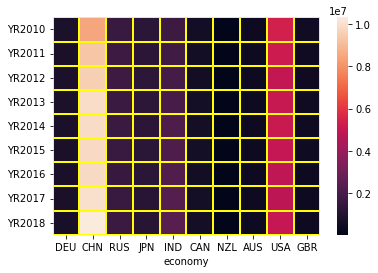

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np

TotalCO2_country = TotalCO2_country.astype(int)   #dataframe values converted to INT

sns.heatmap(TotalCO2_country, linewidths=2, linecolor='yellow')   #heatmap generation 


It illustrates how the total amount of CO2 behaves according to the years and other various countries. It shows that China is emitting a huge amount of CO2
every year from 2010 to 2018 when
compared with other countries. When we
consider only China Fig5. further shows that
the total amount of CO2 produced by China
is increasing yearly (China’s total amount of
CO2 in 2010 is less than the total amount of
CO2 in 2018). The United States is next to
China in emitting CO2 to the environment.
When we study the CO2 number of countries
individually, it is clearly seen that the total
amount of CO2 is increasing. Only China
and the United States are the main
contributors for the emission of CO2 when
compared to other countries. Not only CO2
but also for greenhouse gas these two
countries produce more.
